In [1]:
import pycaret
print(pycaret.__version__)

3.0.4


In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Experiment 2

In [3]:
from pycaret.regression import *
s2 = setup(data, target='charges',
           normalize=True,
           polynomial_features=True,
           bin_numeric_features=['age', 'bmi'])

,Description,Value
0,Session id,4718
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 55)"
5,Transformed train set shape,"(936, 55)"
6,Transformed test set shape,"(402, 55)"
7,Ordinal features,2
8,Numeric features,3
9,Categorical features,3


In [4]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3534.6145,33751848.9217,5809.6341,0.7535,0.4774,0.3271
1,2684.6799,18283211.1154,4275.8872,0.8846,0.4356,0.3888
2,3022.1401,28494959.6903,5338.0670,0.7931,0.4801,0.2754
3,3288.5493,22762217.4718,4770.9766,0.8522,0.4302,0.3680
4,4060.1590,48184177.1023,6941.4823,0.7074,0.4699,0.3033
5,2777.1060,13488239.9656,3672.6339,0.8864,0.4143,0.4392
6,3132.3567,26770404.2269,5174.0124,0.7116,0.5366,0.3060
7,3139.4462,27775615.7544,5270.2577,0.7426,0.5345,0.3168
8,2975.2144,22311020.3469,4723.4543,0.8765,0.4943,0.3266


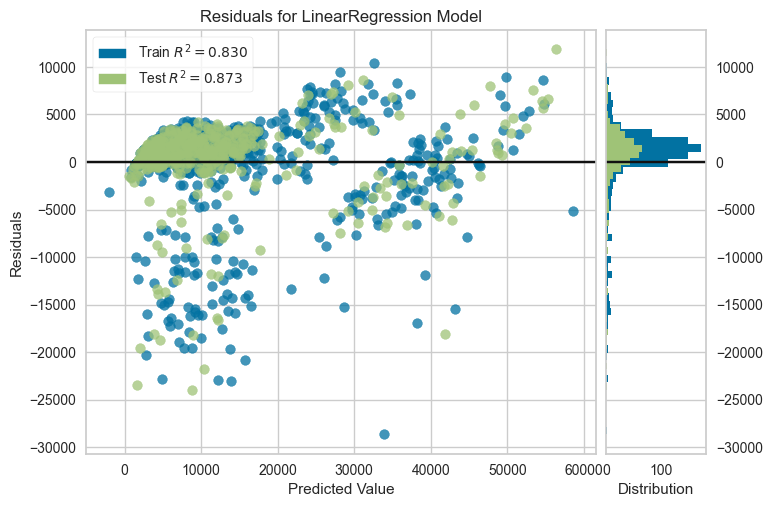

In [5]:
plot_model(lr)

In [6]:
save_model(lr, 'deployment_28042020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\matia\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerW...
                                                               use_cat_names=True))),
                 ('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('bin_numeric_features',
                  TransformerWrapper(include=['age', 'bmi'],
                                     transformer=KBinsDiscretizer(encode='ordinal',
                                                        

In [7]:
deployment_28042020 = load_model('deployment_28042020')

Transformation Pipeline and Model Successfully Loaded


In [8]:
deployment_28042020

Pipeline(memory=FastMemory(location=C:\Users\matia\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                                                              use_cat_names=True))),
                ('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('bin_numeric_features',
                 TransformerWrapper(include=['age', 'bmi'],
                                    transformer=KBinsDiscretizer(encode='ordinal',
                                                                 strategy='kmeans'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('trained_model', LinearRegression(n_jobs=-1))])

In [9]:
!streamlit run app.py

^C
